In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
import warnings 
warnings.filterwarnings('ignore')

## Open Csv file

In [25]:
df=pd.read_csv("E:\Data Science\Priya_project_EOS_1.csv")
df

,Id,Age,HB,WBC_count,EOS_count,Gender,Smoker,Disease
0,1,61,12.4,6320,480.0,2.0,2,1
1,2,31,11.2,5900,472.0,2.0,2,1
2,3,46,15.4,7700,231.0,1.0,2,1
3,4,45,14.7,6900,414.0,1.0,2,1
4,5,50,15.1,11000,1320.0,1.0,2,1
...,...,...,...,...,...,...,...,...
1219,1220,18,13.8,10500,210.0,2.0,2,3
1220,1221,22,13.8,7690,230.0,2.0,2,3
1221,1222,21,14.0,7510,230.0,2.0,2,3
1222,1223,22,13.8,7690,230.0,2.0,2,3


In [26]:
df=df.drop("Id",axis=1)
df

,Age,HB,WBC_count,EOS_count,Gender,Smoker,Disease
0,61,12.4,6320,480.0,2.0,2,1
1,31,11.2,5900,472.0,2.0,2,1
2,46,15.4,7700,231.0,1.0,2,1
3,45,14.7,6900,414.0,1.0,2,1
4,50,15.1,11000,1320.0,1.0,2,1
...,...,...,...,...,...,...,...
1219,18,13.8,10500,210.0,2.0,2,3
1220,22,13.8,7690,230.0,2.0,2,3
1221,21,14.0,7510,230.0,2.0,2,3
1222,22,13.8,7690,230.0,2.0,2,3


## finding null value

In [27]:
df.isnull().sum()

Age           0
HB            0
WBC_count     0
EOS_count     0
Gender       11
Smoker        0
Disease       0
dtype: int64

## filling NA values

In [28]:
df["Gender"].fillna("Gender",inplace=True)
df

,Age,HB,WBC_count,EOS_count,Gender,Smoker,Disease
0,61,12.4,6320,480.0,2.0,2,1
1,31,11.2,5900,472.0,2.0,2,1
2,46,15.4,7700,231.0,1.0,2,1
3,45,14.7,6900,414.0,1.0,2,1
4,50,15.1,11000,1320.0,1.0,2,1
...,...,...,...,...,...,...,...
1219,18,13.8,10500,210.0,2.0,2,3
1220,22,13.8,7690,230.0,2.0,2,3
1221,21,14.0,7510,230.0,2.0,2,3
1222,22,13.8,7690,230.0,2.0,2,3


In [29]:
df.isnull().sum()

Age          0
HB           0
WBC_count    0
EOS_count    0
Gender       0
Smoker       0
Disease      0
dtype: int64

In [30]:
df.describe()

,Age,HB,WBC_count,EOS_count,Smoker,Disease
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,47.872549,13.771324,8046.124183,377.196266,4.132353,2.000817
std,17.147909,2.154245,2378.922501,294.231086,49.336087,0.816329
min,18.000000,7.400000,3180.000000,0.000000,1.000000,1.000000
25%,33.000000,12.300000,6500.000000,168.000000,1.000000,1.000000
50%,47.500000,13.700000,7690.000000,280.000000,2.000000,2.000000
75%,63.000000,15.100000,9300.000000,510.500000,2.000000,3.000000
max,85.000000,23.600000,22900.000000,2400.000000,999.000000,3.000000


## Assumptions

In [31]:

import seaborn as sns

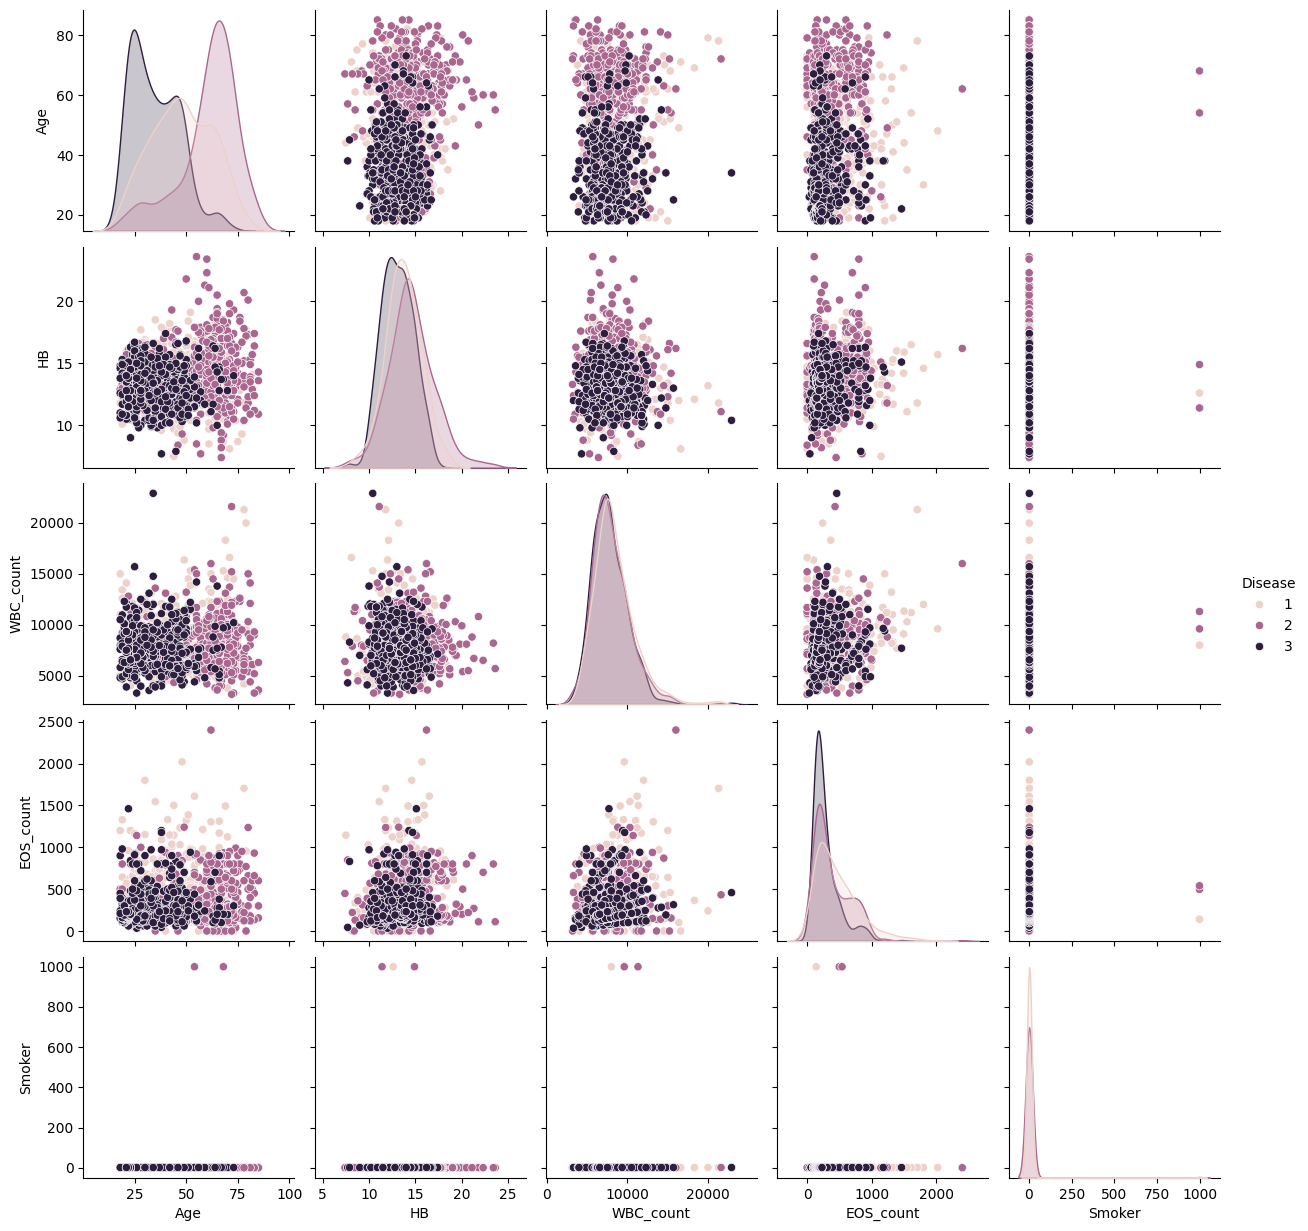

In [32]:
sns.pairplot(data=df,hue="Disease")

## Balance/imbalence data

In [33]:
df["Disease"].value_counts(normalize=True)*100

Disease
2    33.415033
3    33.333333
1    33.251634
Name: proportion, dtype: float64

## Seperation of data

In [34]:
x= df.iloc[:,:-3]
x

,Age,HB,WBC_count,EOS_count
0,61,12.4,6320,480.0
1,31,11.2,5900,472.0
2,46,15.4,7700,231.0
3,45,14.7,6900,414.0
4,50,15.1,11000,1320.0
...,...,...,...,...
1219,18,13.8,10500,210.0
1220,22,13.8,7690,230.0
1221,21,14.0,7510,230.0
1222,22,13.8,7690,230.0


In [35]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
1219    3
1220    3
1221    3
1222    3
1223    3
Name: Disease, Length: 1224, dtype: int64

## spliting of the data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=40, stratify=df.Disease) 

## one vs rest / one vs all /ovr

In [45]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
model=LogisticRegression()
ovr=OneVsRestClassifier(model)
ovr

OneVsRestClassifier(estimator=LogisticRegression())

In [47]:
ovr.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [48]:
y_pred=ovr.predict(x_test)
y_pred

array([3, 2, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 1, 3, 3,
       2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 1, 2, 1, 2, 1, 3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 3, 3, 1, 3,
       2, 1, 1, 2, 3, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 2, 1, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 1, 2, 3, 2, 3, 3, 1, 2,
       1, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 1, 3, 2,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 3, 1, 2,
       1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 1, 2, 2,
       3, 2, 2, 3, 3, 3, 1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 1, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 2, 3,

In [49]:
from sklearn import metrics

In [50]:
a=metrics.confusion_matrix(y_test,y_pred #### OVR 2*2, multiclass classification
a

array([[38, 38, 26],
       [ 8, 83, 11],
       [17,  9, 76]])

In [51]:
tp fp
fn tn

SyntaxError: invalid syntax (3010099988.py, line 1)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [52]:
a.ravel()

array([38, 38, 26,  8, 83, 11, 17,  9, 76])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
fscore##
metrics.f1_score(y_test,y_pred)


In [ ]:
##ROC curve

fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)

In [ ]:
##AUC 
metrics.auc(y_test,y_pred)


In [ ]:
### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model= SVC()
svm_model

In [ ]:
svm_model.fit(x_train,y_train)

In [ ]:
y_pred_training= svm_model.predict(x_train)
y_pred_testing= svm_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("classification report for training data :",classification_report(y_train, y_pred_training))
print("*"*20)
print("classification report for training data :",classification_report(y_test,y_pred_testing))

#### Descision tree

In [ ]:
df["Disease"].value_counts(normalize=True)

In [ ]:
### Imbalanced Data

In [ ]:
sns.pairplot(df,hue="Disease")

In [ ]:
### Data is not linearly seperable

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=10)
dt

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
dt.score(x_train,y_train)

In [ ]:
dt.score(x_test,y_test)

In [ ]:
### Overfitting  #### random instead of SVM

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt,filled=True)

In [ ]:
### prunning

In [ ]:
from sklearn.model_selection import GridSearchCV ### For whole data

In [ ]:
grid={"criterion":["ginni","entropy"],
     "max_depth":range(2,40,1),
     "min_samples_split":range(1,20,1),
     "min_samples_leaf":range(1,20,1)}
grid

In [ ]:
dt_gd=DecisionTreeClassifier(random_state=100)
dt_gd

In [ ]:
gd=GridSearchCV(estimator=dt_gd,param_grid=grid,cv=5,n_jobs=-1)
gd###hyperparamtunnig

In [ ]:
gd.fit(x_train,y_train)

In [ ]:
gd.best_score_

In [ ]:
gd.best_params_

In [ ]:
dt1=DecisionTreeClassifier(criterion="entropy",
   max_depth=2,min_samples_leaf=1,min_samples_split= 2)
dt1

In [ ]:
dt1.fit(x_train,y_train)

In [ ]:
dt1.score(x_test,y_test)

In [ ]:
dt1.score(x_train,y_train)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt1,filled=True)

In [ ]:
train_accuracy=[]
test_accuracy=[]
for i in range (1,50):
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))
data_max_depth=pd.DataFrame({"max_depth":range(1,50),"Train_accuracy":train_accuracy,"test_accuracy":test_accuracy})
data_max_depth

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(data_max_depth ["max_depth"], data_max_depth ["Train_accuracy"], marker="o")

plt.plot(data_max_depth ["max_depth"], data_max_depth ["test_accuracy"], marker="*")

plt.xlabel("max_depth")

plt.ylabel("performance comparison")

In [ ]:
### post_pruning 

classifier= DecisionTreeClassifier(random_state=20)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=40, stratify=df.Disease) 

In [ ]:
classifier.fit(x_train,y_train)

In [ ]:
classifier.score(x_train,y_train)

In [ ]:
classifier.score(x_test,y_test)

In [ ]:
path=classifier.cost_complexity_pruning_path(x_train,y_train)

In [ ]:
ccp_alphas=path.ccp_alphas
train_accuracy=[]
test_accuracy=[]
for i in ccp_alphas:
    dt_model=DecisionTreeClassifier(ccp_alpha=i,random_state=10)
    df_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

In [ ]:
### logistic Model

import pickle

with open("logistic_model.pkl","wb") as file:
    pickle.dump(model,file)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
rf.score(x_train,y_train)

In [ ]:
rf.score(x_test,y_test)